In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import pandas as pd
from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [3]:
file_path = "lab4.txt"

with open(file_path, 'r') as file:
    content = file.read()

In [ ]:
contractions = pd.read_csv("contractions.csv")

expanded_text = ""
for each in content.split():
    for index in range(len(contractions)):
        if (each == contractions["contraction"][index]):
            each = contractions["expanded"][index]
            break
    expanded_text += each + " "
    
sent_list = sent_tokenize(expanded_text)
print(len(sent_list))
largest = ""
for each in sent_list:
    if (len(word_tokenize(each)) > len(word_tokenize(largest))):
        largest = each

largest

In [ ]:
for index in range(len(sent_list)):
    sent_list[index] = [word.lower() for word in word_tokenize(sent_list[index])]

In [ ]:
myDict = {}
for index in range(len(sent_list)):
    for index2 in range(len(sent_list[index])):
        if (myDict.get(sent_list[index][index2]) != None):
            myDict[sent_list[index][index2]] = myDict.get(sent_list[index][index2])+1
        else:
            myDict.update({sent_list[index][index2]: 1})
maxV = (None, 0)
for each in myDict:
    if myDict[each] > maxV[1]:
        maxV = (each, myDict[each])

maxV

In [ ]:
from datetime import datetime
trueData = pd.read_csv("True.csv")

In [35]:
trueData["date"] = pd.to_datetime(trueData["date"], errors="coerce", format="mixed")

target = datetime.strptime("03/2017", "%m/%Y")

targetData = trueData[(trueData["date"].dt.month == target.month)  & (trueData["date"].dt.year == target.year)]

places = set()

for each in targetData["text"]:
    doc = nlp(each)
    places.update({word.text for word in doc.ents if (word.label_ == "GPE")})
len(places)
#'bisexual',
 # 'boycotts',
 # 'marijuana',
 # 'n’t', were all classified as places for spacy which I found interesting, its imperfect but it works out

460

In [36]:
fakeData = pd.read_csv("Fake.csv")

In [ ]:
fakeData["date"] = pd.to_datetime(fakeData["date"], errors="coerce", format="mixed")

target = datetime.strptime("03/2017", "%m/%Y")

targetData = fakeData[(fakeData["date"].dt.month == target.month)  & (fakeData["date"].dt.year == target.year)]

places = set()
print(4)
for each in targetData["text"]:
    doc = nlp(each)
    places.update({word.text for word in doc.ents if (word.label_ == "GPE")})
# len(places)

In [8]:
from collections import defaultdict

target = datetime.strptime("08/11/2016", "%d/%m/%Y")

targetDataTrue = trueData[trueData["date"] == target]

peopleTrue = defaultdict(int)
for each in targetDataTrue["text"]:
    doc = nlp(each)
    for token in doc.ents:
        if token.label_ == "PERSON":
            peopleTrue[token.text.split()[-1]] += 1
peopleTrue = pd.DataFrame(peopleTrue.items())
top5true = peopleTrue.sort_values(1, ascending=False).head(5)
top5true #Clinton trump and obama were top 3

,0,1
2,Clinton,44
0,Trump,43
8,Obama,18
135,Hastert,13
1,Ryan,10


In [9]:
target = datetime.strptime("08/11/2016", "%d/%m/%Y")

targetDataFake = fakeData[fakeData["date"] == target]

peopleFake = defaultdict(int)
for each in targetDataFake["text"]:
    doc = nlp(each)
    for token in doc.ents:
        if token.label_ == "PERSON":
            peopleFake[token.text.split()[-1]] += 1
peopleFake = pd.DataFrame(peopleFake.items())
top5fake = peopleFake.sort_values(1, ascending=False).head(5)
top5fake

,0,1
2,Clinton,131
0,Trump,107
19,Hillary,35
47,Obama,21
85,Sanders,20


Text(0, 0.5, 'Frequency')

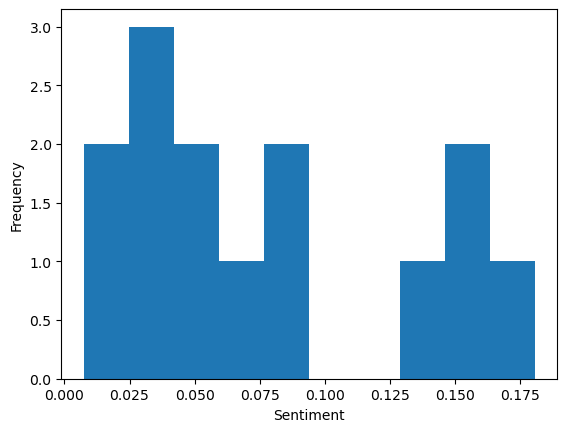

In [10]:
import matplotlib.pyplot as plt


trueSent = []

for each in targetDataTrue["text"]:
    doc = nlp(each)
    for token in doc.ents:
        if token.label_ == "PERSON" and top5true[0].head(1).iloc[0] in token.text:
            sent = doc._.blob.polarity
            trueSent.append(doc._.blob.polarity)
            break

plt.hist(trueSent, bins=10)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
# pretty neutral but all generally positive

Text(0, 0.5, 'Frequency')

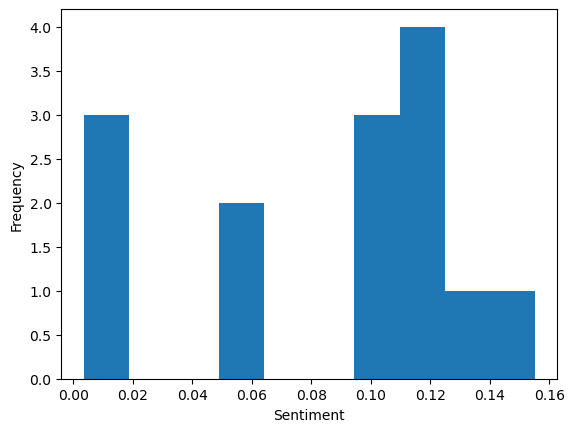

In [11]:
fakeSent = []

for each in targetDataFake["text"]:
    doc = nlp(each)
    for token in doc.ents:
        if token.label_ == "PERSON" and top5fake[0].head(1).iloc[0] in token.text:
            sent = doc._.blob.polarity
            fakeSent.append(doc._.blob.polarity)
            break

plt.hist(fakeSent, bins=10)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

#Either neutral or positive media, which is pretty impressive, but still all around neutral

Text(0, 0.5, 'Frequency')

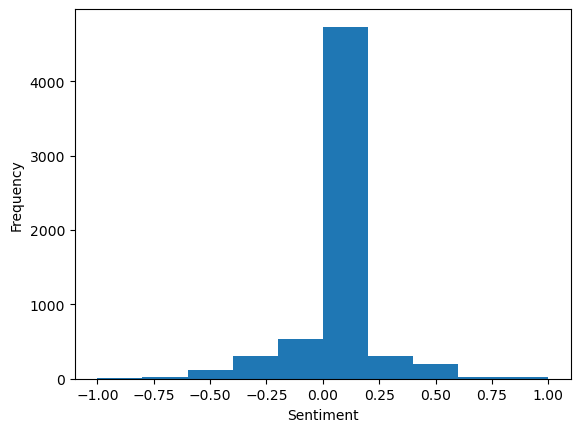

In [43]:
start = datetime.strptime("1/10/2017", "%d/%m/%Y")
end = datetime.strptime("30/11/2017", "%d/%m/%Y")

targetDataTrue = trueData[(trueData["date"] >= start) & (trueData["date"] <= end)]

trueSent = []

for each in targetDataTrue["title"]:
    doc = nlp(each)
    trueSent.append(doc._.blob.polarity)

plt.hist(trueSent, bins=10)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

# I chose this time frame as it was about the time of the me too movement resurgence. The news looks to be almost all neutral, there are a few extremely positive and extremely negative articles

Text(0, 0.5, 'Frequency')

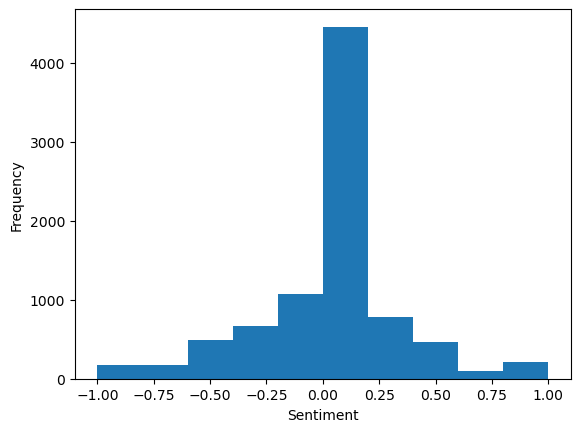

In [45]:
start = datetime.strptime("1/10/2017", "%d/%m/%Y")
end = datetime.strptime("30/11/2017", "%d/%m/%Y")

targetDataTrue = fakeData[(trueData["date"] >= start) & (fakeData["date"] <= end)]

fakeSent = []

for each in targetDataTrue["title"]:
    doc = nlp(each)
    fakeSent.append(doc._.blob.polarity)

plt.hist(fakeSent, bins=10)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

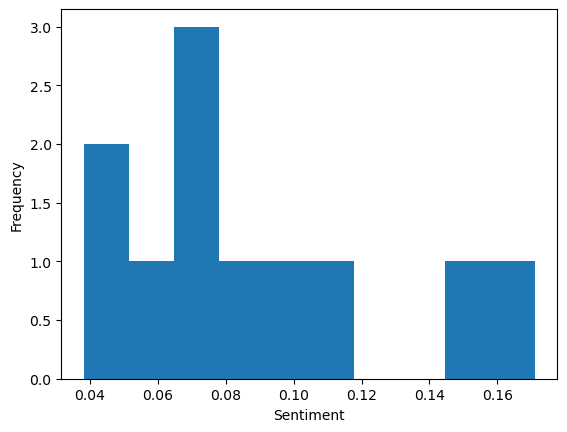

In [13]:
target = datetime.strptime("06/2016", "%m/%Y")

targetData = trueData[(trueData["date"].dt.month == target.month)  & (trueData["date"].dt.year == target.year)]

# target = datetime.strptime("05/2016", "%m/%Y")

# targetData = pd.concat([targetData, trueData[(trueData["date"].dt.month == target.month)  & (trueData["date"].dt.year == target.year)]], ignore_index=True)


trueBrexitSent = []

for each in targetData["text"]:
    doc = nlp(each)
    for token in doc.ents:
        if token.text.lower() == "brexit":
            sent = doc._.blob.polarity
            trueBrexitSent.append(sent)
            break
plt.hist(trueBrexitSent)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

#Impressively positive sentiments about brexit

Text(0, 0.5, 'Frequency')

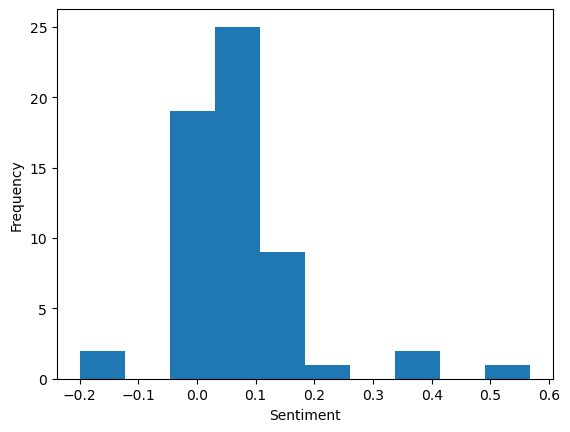

In [14]:
target = datetime.strptime("06/2016", "%m/%Y")

targetData = fakeData[(fakeData["date"].dt.month == target.month)  & (fakeData["date"].dt.year == target.year)]
# target = datetime.strptime("05/2016", "%m/%Y")

# targetData = pd.concat([targetData, fakeData[(fakeData["date"].dt.month == target.month)  & (fakeData["date"].dt.year == target.year)]], ignore_index=True)

fakeBrexitSent = []

for each in targetData["text"]:
    doc = nlp(each)
    for token in doc.ents:
        if token.text.lower() == "brexit":
            sent = doc._.blob.polarity
            fakeBrexitSent.append(sent)

plt.hist(fakeBrexitSent)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
#more negative sentiments about brexit

In [15]:
import time


times = pd.DataFrame({"Model": [],
                    "Time": []})

for model in ["en_core_web_sm", "en_core_web_md", "en_core_web_lg", "en_core_web_trf"]:
    nlp = spacy.load(model)
    start = time.time()
    for index, art in trueData.head().iterrows():
        #print(art)
        nlp(art["text"])
    stop = time.time()
    times.loc[len(times)] = {"Model": model, "Time": stop-start}
        

<BarContainer object of 4 artists>

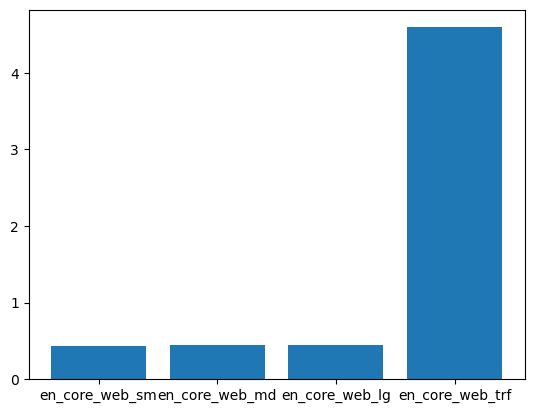

In [16]:
plt.bar("Model", "Time", data=times)